In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
train_data = pd.read_csv('Train.csv')
print("Shape of train_data:", train_data.shape)

Shape of train_data: (7453, 785)


In [3]:
X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of X after separating features: (7453, 784)


In [4]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (7453, 28, 28, 1)


In [5]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (7453, 10)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train shape:", X_train.shape)

X_train shape: (5962, 28, 28, 1)


In [7]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7059 - loss: 1.0690 - val_accuracy: 0.8806 - val_loss: 0.3714
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9143 - loss: 0.2873 - val_accuracy: 0.9249 - val_loss: 0.2364
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9421 - loss: 0.2033 - val_accuracy: 0.9349 - val_loss: 0.2040
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9597 - loss: 0.1440 - val_accuracy: 0.9336 - val_loss: 0.2155
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9718 - loss: 0.1028 - val_accuracy: 0.9423 - val_loss: 0.1939
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9808 - loss: 0.0700 - val_accuracy: 0.9396 - val_loss: 0.1747
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9863 - loss: 0.0517 - val_accuracy: 0.9484 - val_loss: 0.1753
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9929 - loss: 0.0319 - val_accuracy: 0

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9482 - loss: 0.1633
Validation Accuracy: 94.84%


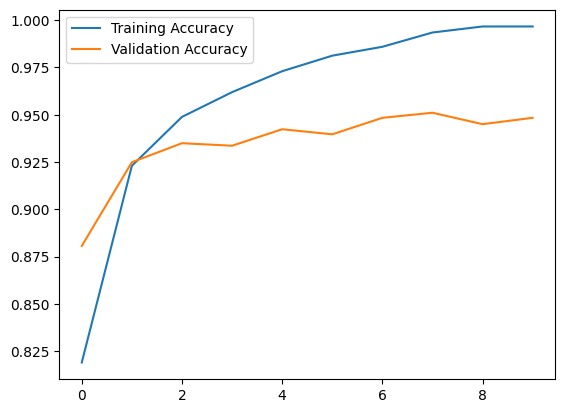

In [9]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


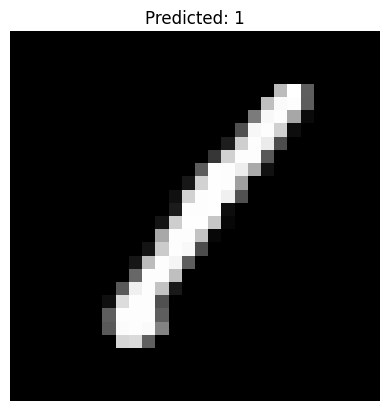

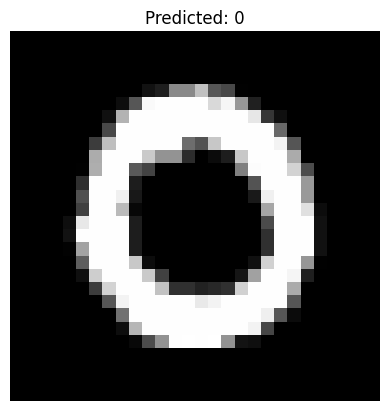

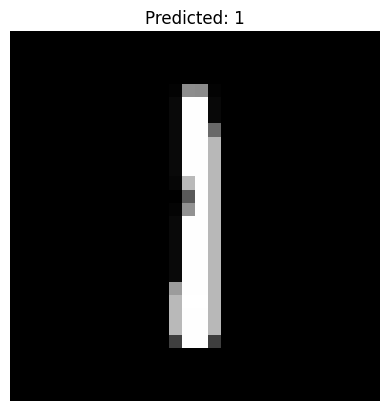

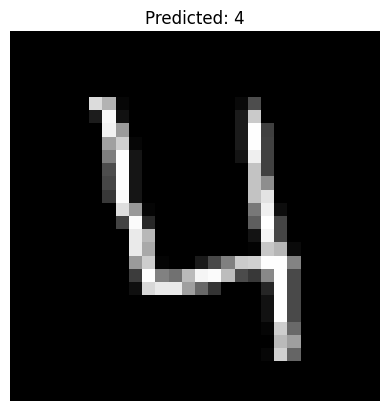

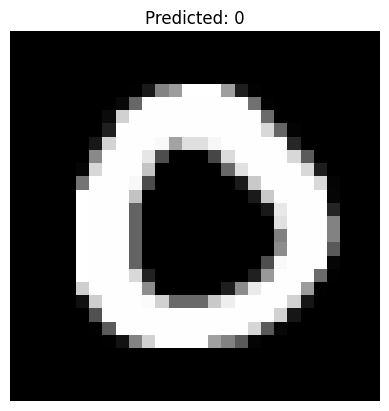

In [10]:
test_data = pd.read_csv('Train.csv')
X_test = test_data.drop('label', axis=1).values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()